<a href="https://colab.research.google.com/github/noprisigit/Xception/blob/main/Xception_3_Kelas_20250609_ColabPaid5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import itertools
from collections import Counter


#tensorflow
import tensorflow.image as tfi
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Concatenate, ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax, SGD, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [4]:
!unzip '/content/drive/MyDrive/combine-iarc-annocerv-3kelas-resized-augmented.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_aug7.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_aug8.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_aug9.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB0_orig.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug0.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug1.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug10.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug11.jpg  
  inflating: combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2/AABB2_aug12.jpg  
  inflating: combine-iarc-annocerv-3kelas-resiz

In [5]:
CIN_1 = '/content/combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_1'
CIN_2 = '/content/combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_2'
CIN_3 = '/content/combine-iarc-annocerv-3kelas-resized-augmented/train_augmented/CIN_3'
# NORMAL = '/content/drive/MyDrive/dataset/iarc-annocerv/Normal'
# root_path = '/content/drive/MyDrive/dataset/iarc-annocerv'

# NORMAL = '/content/combine-iarc-annocerv-2kelas-resized-augmented/train_augmented/Normal'
# ABNORMAL = '/content/combine-iarc-annocerv-2kelas-resized-augmented/train_augmented/Abnormal'
test_path = '/content/combine-iarc-annocerv-3kelas-resized-augmented/test'
root_path = '/content/combine-iarc-annocerv-3kelas-resized-augmented'

In [6]:
# classes = sorted(os.listdir(root_path))
classes = ['CIN_1', 'CIN_2', 'CIN_3']
# classes = ['Normal', 'Abnormal']
# print(classes)

In [7]:
# dir_list_cancer = [CIN_1, CIN_2, CIN_3]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cancer, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('Cancer')
# dir_list_cin_1 = [CIN_1]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cin_1, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('CIN_1')

# dir_list_cin_2 = [CIN_2]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cin_2, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('CIN_2')

# dir_list_cin_3 = [CIN_3]
# filepaths = []
# labels = []

# for i,j in zip(dir_list_cin_3, classes):
#     filelist = os.listdir(i)
#     for name in filelist:
#         filepath = os.path.join(i, name)
#         filepaths.append(filepath)
#         labels.append('CIN_3')

# print('filepaths:', len(filepaths), 'labels:', len(labels))

In [8]:
dir_list = [CIN_1, CIN_2, CIN_3]
filepaths = []
labels = []

for i,j in zip(dir_list, classes):
    filelist = os.listdir(i)
    for name in filelist:
        filepath = os.path.join(i, name)
        filepaths.append(filepath)
        labels.append(j)
print('filepaths:', len(filepaths), 'labels:', len(labels))

filepaths: 7861 labels: 7861


In [9]:
file_content=pd.Series(filepaths, name='filepaths')
label_content=pd.Series(labels, name='labels')
df=pd.concat([file_content,label_content], axis=1)
df=pd.DataFrame(np.array(df).reshape(len(filepaths),2), columns = ['filepaths', 'labels'])

In [10]:
df

filepaths labels
0     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
1     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
2     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
3     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
4     /content/combine-iarc-annocerv-3kelas-resized-...  CIN_1
...                                                 ...    ...
7856  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7857  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7858  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7859  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3
7860  /content/combine-iarc-annocerv-3kelas-resized-...  CIN_3

[7861 rows x 2 columns]

In [11]:
df.shape

(7861, 2)

In [12]:
label_counts = df['labels'].value_counts()
print(label_counts.reindex(classes))

labels
CIN_1    2706
CIN_2    2555
CIN_3    2600
Name: count, dtype: int64


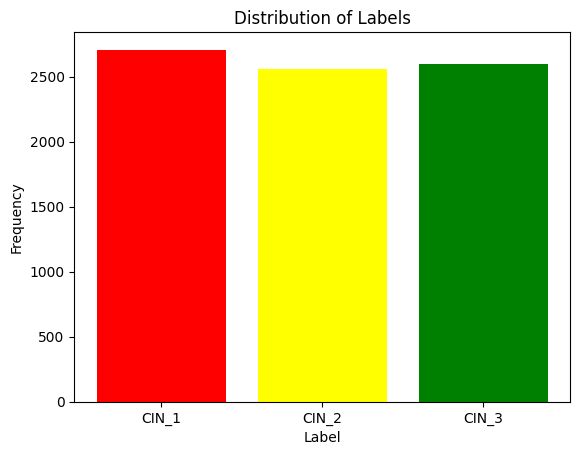

In [13]:
colors = ['red', 'yellow', 'green', 'orange']

label_counts_ordered = label_counts.reindex(classes)

plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

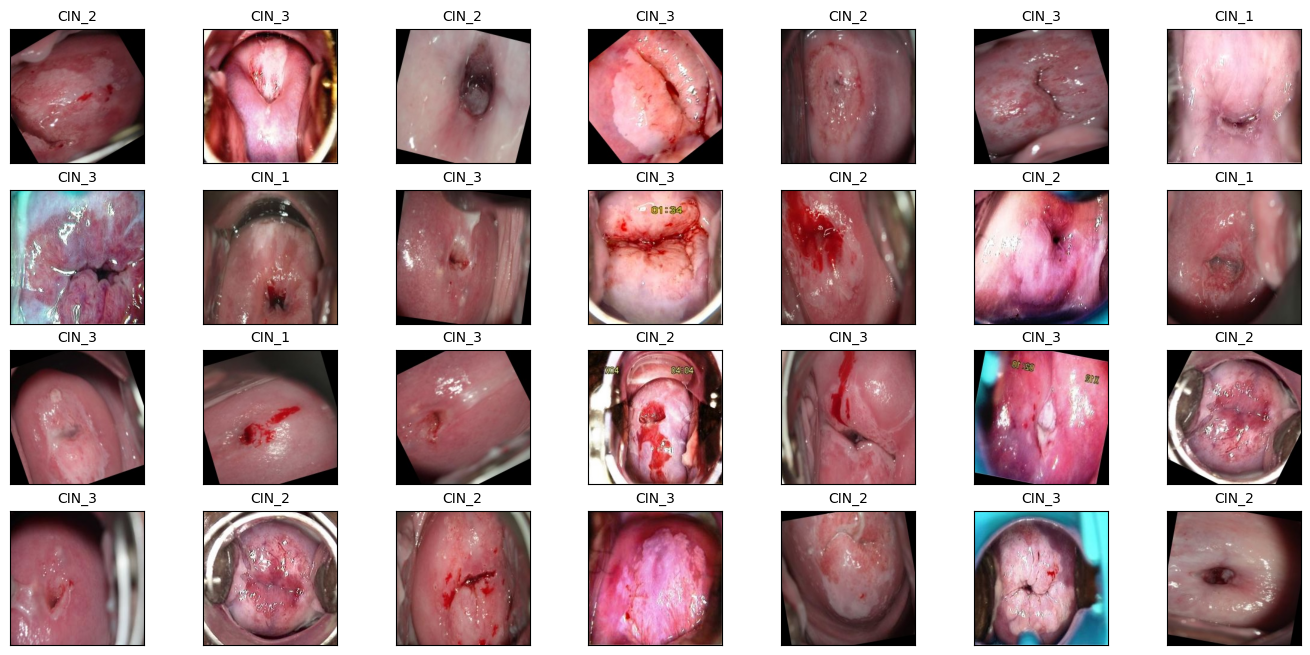

In [14]:
plt.figure(figsize=(17,8))
x1 = 4
x2 = 7
has = x1 * x2

for i in range(has):
    random = np.random.randint(1,len(df))
    plt.subplot(x1,x2,i+1)
    image = cv2.imread(df.loc[random,"filepaths"])
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(df.loc[random, "labels"], size = 10)
    plt.xticks([])
    plt.yticks([])

In [15]:
train, valid = train_test_split(df, train_size=0.8, shuffle=True, random_state=1)

In [16]:
train.shape, valid.shape

((6288, 2), (1573, 2))

In [17]:
img_size = (224, 224)
batch_size = 32

In [18]:
tr_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    fill_mode='nearest'
    # preprocessing_function=image_CALHE
)

val_gen = ImageDataGenerator(
    rescale= 1./255,
    # preprocessing_function=image_CALHE
)


train_gen = tr_gen.flow_from_dataframe(df , x_col = 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size = batch_size)

valid_gen = val_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'labels' , target_size = img_size ,
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= False, batch_size = batch_size)

test_gen = val_gen.flow_from_directory(
    directory=test_path,  # ganti dengan path folder test kamu
    target_size=img_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False,
    batch_size=batch_size
)


Found 7861 validated image filenames belonging to 3 classes.
Found 1573 validated image filenames belonging to 3 classes.
Found 112 images belonging to 3 classes.


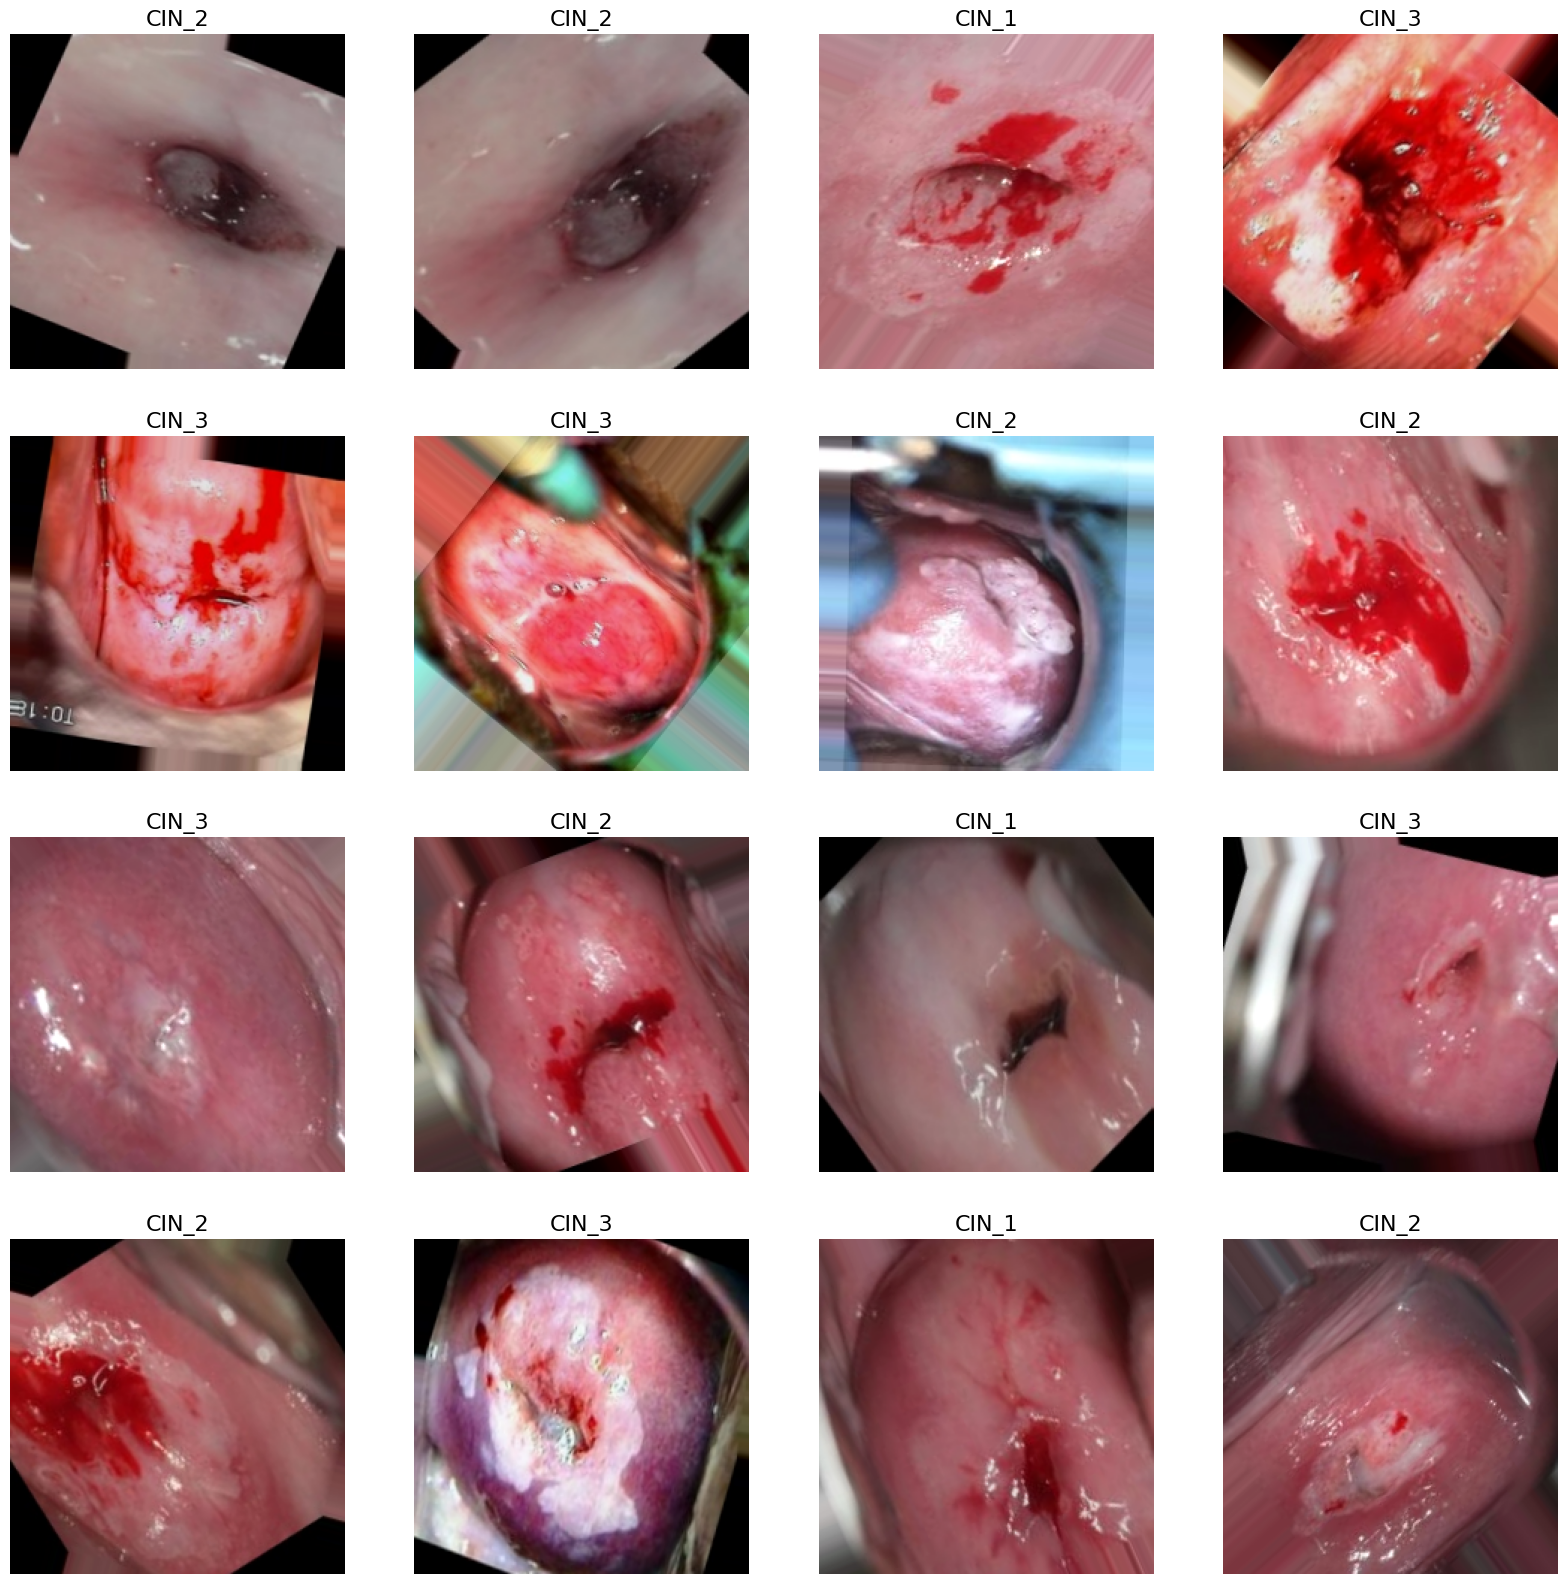

In [19]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)
plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] # / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 16)
    plt.axis('off')
plt.show();

In [20]:
INPUT_SHAPE = (img_size[0] , img_size[1] , 3)
NUM_CLASSES = len(classes)
print(INPUT_SHAPE)

(224, 224, 3)


In [21]:
input_tensor = keras.Input(shape=INPUT_SHAPE)
resnet_base = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)

for layer in resnet_base.layers:
    layer.trainable = False

resnet_output = GlobalAveragePooling2D()(resnet_base.output)
x = Flatten()(resnet_output)
# x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

optimizer = Adam(learning_rate=1e-5)

for layer in resnet_base.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 21,912,107 (83.59 MB)

 Trainable params: 4,214,275 (16.08 MB)

 Non-trainable params: 17,697,832 (67.51 MB)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

# model_name = "cervicalModel.weights.keras"
# checkpoint = ModelCheckpoint(model_name, monitor='val_loss', verbose=1,save_best_only=True, mode= 'min')
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose= 1, mode='min', factor= 0.2, min_lr = 1e-5)

earlystopping = EarlyStopping(monitor='val_loss', patience = 5, verbose=1, mode='min', restore_best_weights= True)

In [23]:
class_labels = train_gen.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_labels),
    y=class_labels
)

class_weight_dict = dict(zip(np.unique(class_labels), class_weights))
print("Class weights:", class_weight_dict)

epochs = 100

history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    callbacks=[earlystopping, learning_rate_reduction],
    validation_data=valid_gen,
    class_weight=class_weight_dict
)

Class weights: {np.int64(0): np.float64(0.9683419561468342), np.int64(1): np.float64(1.0255707762557078), np.int64(2): np.float64(1.0078205128205129)}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 161s 584ms/step - accuracy: 0.3688 - auc: 0.5329 - loss: 1.2058 - val_accuracy: 0.4933 - val_auc: 0.6860 - val_loss: 1.0993 - learning_rate: 1.0000e-05
Epoch 2/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 135s 548ms/step - accuracy: 0.4577 - auc: 0.6409 - loss: 1.1242 - val_accuracy: 0.5410 - val_auc: 0.7365 - val_loss: 1.0463 - learning_rate: 1.0000e-05
Epoch 3/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 129s 522ms/step - accuracy: 0.5269 - auc: 0.7110 - loss: 1.0625 - val_accuracy: 0.5944 - val_auc: 0.7746 - val_loss: 1.0001 - learning_rate: 1.0000e-05
Epoch 4/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 130s 530ms/step - accuracy: 0.5544 - auc: 0.7444 - loss: 1.0225 - val_accuracy: 0.6268 - val_auc: 0.7959 - val_loss: 0.9632 - learning_rate: 1.0000e-05
Epoch 5/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 132s 535ms/step - accuracy: 0.5888 - auc: 0.7732 - loss: 0.9850 - val_accuracy: 0.6395 - val_auc: 0.8180 - val_loss: 0.9266 - learning_rate: 1.0000e-05
Epoch 6/100
246/246 ━━━━━━━━━━━━━━━

In [24]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss + 1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

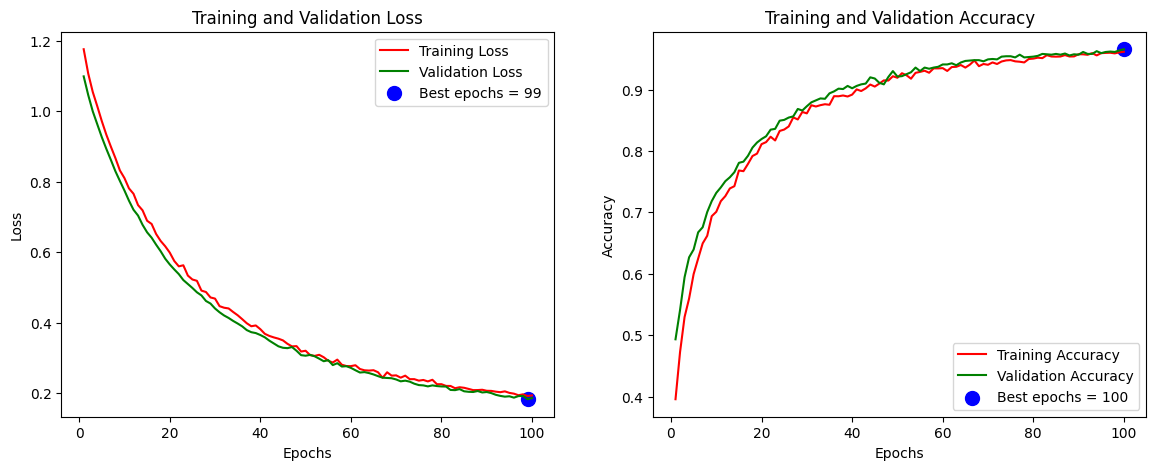

In [25]:
plt.figure(figsize= (14,5))

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 100 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 100 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [26]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 546ms/step - accuracy: 0.9915 - auc: 0.9996 - loss: 0.1335
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9635 - auc: 0.9965 - loss: 0.1922
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.5638 - auc: 0.7088 - loss: 1.8118


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Train Loss:  0.15006214380264282
Train Accuracy:  0.986328125
--------------------
Validation Loss:  0.18685422837734222
Validation Accuracy:  0.96484375
--------------------
Test Loss:  1.9232741594314575
Test Accuracy:  0.5357142686843872


In [27]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


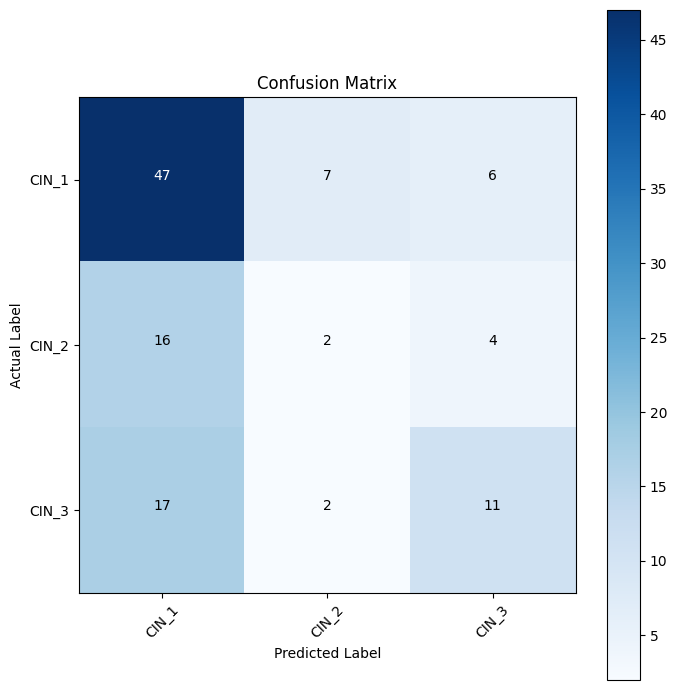

In [28]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (7, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.show()

In [29]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

       CIN_1       0.59      0.78      0.67        60
       CIN_2       0.18      0.09      0.12        22
       CIN_3       0.52      0.37      0.43        30

    accuracy                           0.54       112
   macro avg       0.43      0.41      0.41       112
weighted avg       0.49      0.54      0.50       112



## Grad-CAM

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tqdm import tqdm

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())
    return heatmap.numpy()

def overlay_heatmap_on_image(img_array, heatmap, alpha=0.4):
    img = np.uint8(255 * img_array)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.uint8(superimposed_img)
    return superimposed_img

def display_gradcam_from_generator(test_gen, model, last_conv_layer_name, num_images=5):
    test_gen.reset()
    for i in tqdm(range(num_images)):
        # Changed from test_gen.next() to next(test_gen)
        img_batch, label_batch = next(test_gen)
        img_array = img_batch[0]
        img_input = np.expand_dims(img_array, axis=0)

        heatmap = make_gradcam_heatmap(img_input, model, last_conv_layer_name)
        overlay_img = overlay_heatmap_on_image(img_array, heatmap)

        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(img_array)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(overlay_img)
        plt.title("Grad-CAM")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


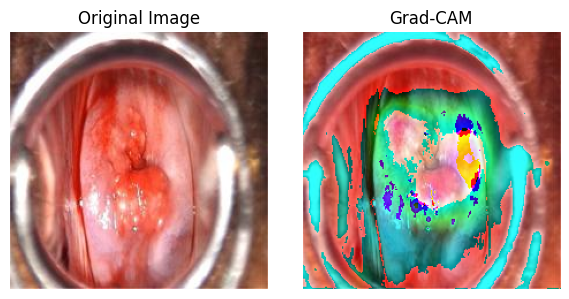

  5%|▌         | 1/20 [00:04<01:16,  4.03s/it]

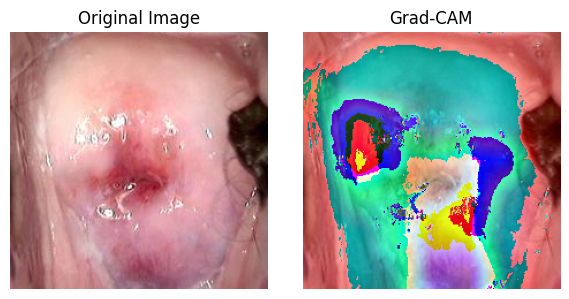

 10%|█         | 2/20 [00:05<00:42,  2.36s/it]

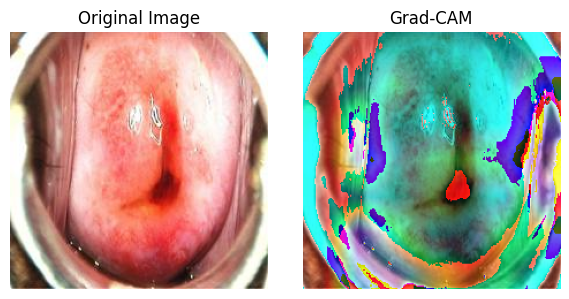

 15%|█▌        | 3/20 [00:05<00:27,  1.62s/it]

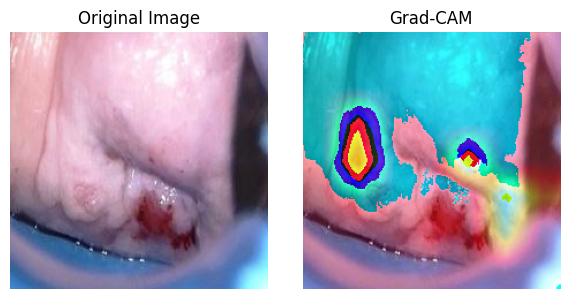

 20%|██        | 4/20 [00:06<00:19,  1.24s/it]

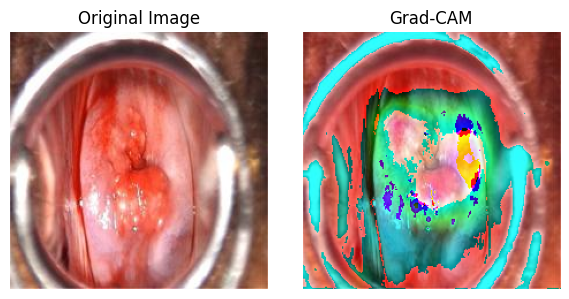

 25%|██▌       | 5/20 [00:07<00:15,  1.05s/it]

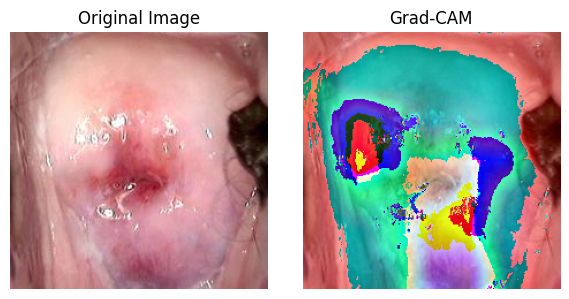

 30%|███       | 6/20 [00:08<00:13,  1.07it/s]

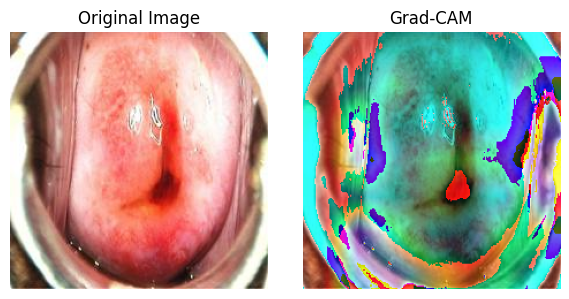

 35%|███▌      | 7/20 [00:08<00:11,  1.14it/s]

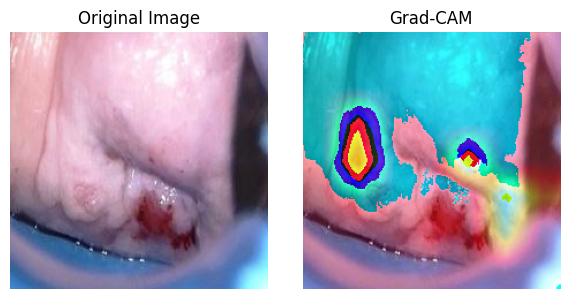

 40%|████      | 8/20 [00:09<00:09,  1.31it/s]

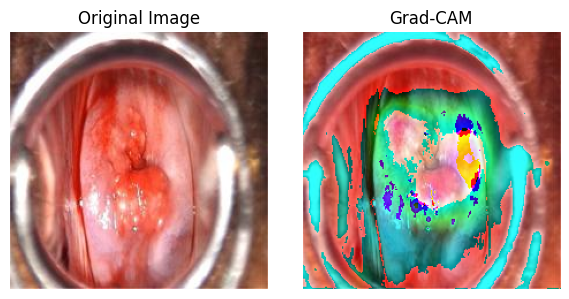

 45%|████▌     | 9/20 [00:09<00:07,  1.45it/s]

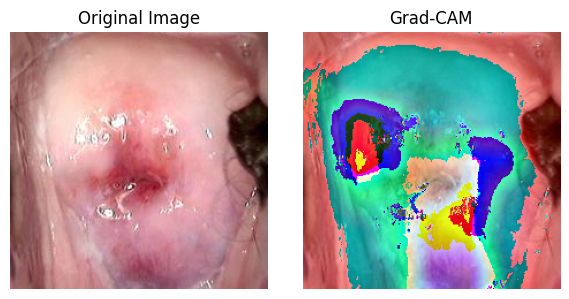

 50%|█████     | 10/20 [00:10<00:06,  1.57it/s]

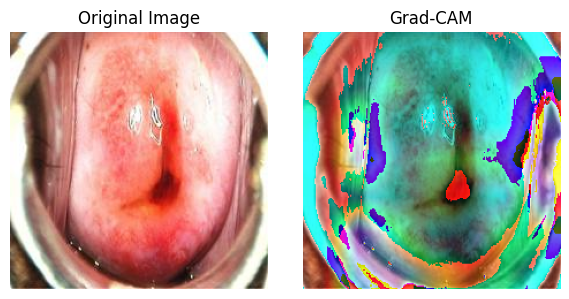

 55%|█████▌    | 11/20 [00:10<00:05,  1.65it/s]

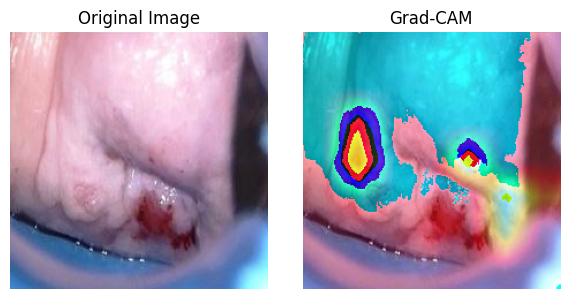

 60%|██████    | 12/20 [00:11<00:04,  1.73it/s]

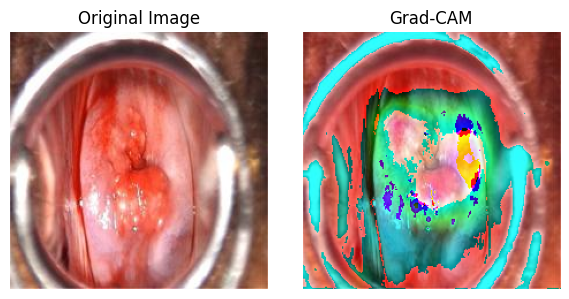

 65%|██████▌   | 13/20 [00:11<00:04,  1.75it/s]

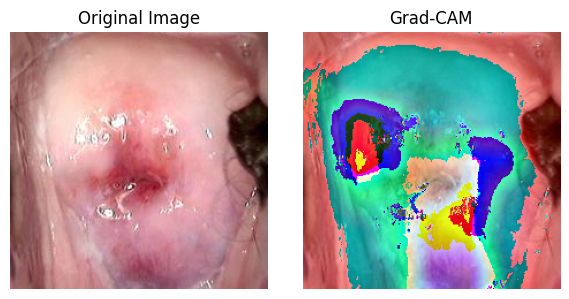

 70%|███████   | 14/20 [00:12<00:03,  1.79it/s]

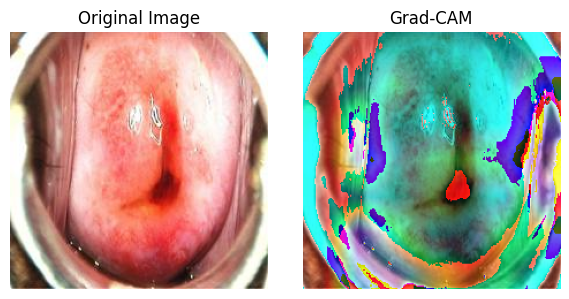

 75%|███████▌  | 15/20 [00:13<00:02,  1.81it/s]

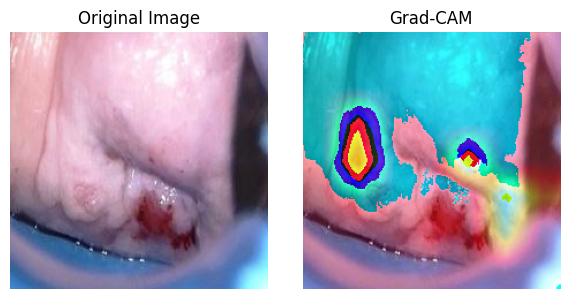

 80%|████████  | 16/20 [00:13<00:02,  1.83it/s]

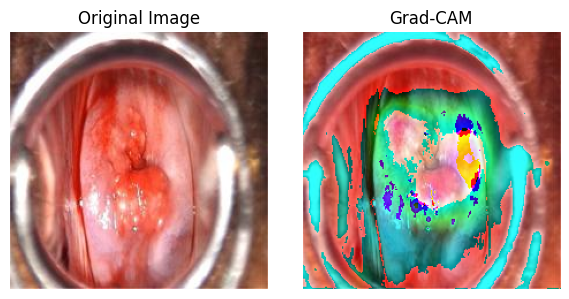

 85%|████████▌ | 17/20 [00:14<00:01,  1.85it/s]

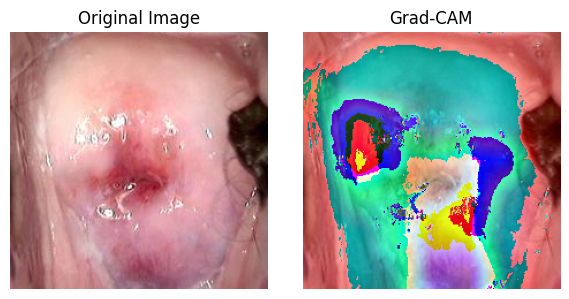

 90%|█████████ | 18/20 [00:14<00:01,  1.83it/s]

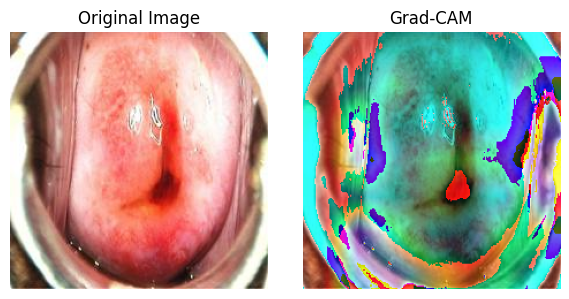

 95%|█████████▌| 19/20 [00:15<00:00,  1.55it/s]

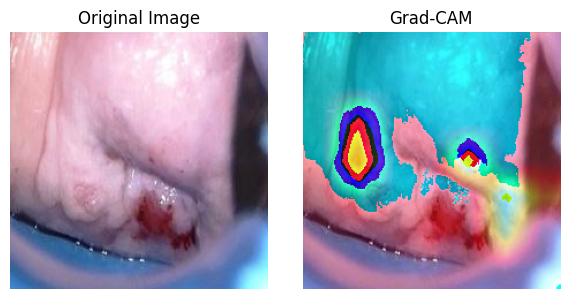

100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


In [32]:
last_conv_layer_name = "conv2d_3"  # Ganti sesuai layer konvolusi akhir model Anda
display_gradcam_from_generator(test_gen, model, last_conv_layer_name, num_images=20)